# 8章 機械学習の基礎（教師あり学習）

In [1]:
import numpy as np 
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import sklearn
%precision 3

'%.3f'

### 重回帰 (価格の予測)

In [2]:
# 自動車データの読み込み
import requests,zipfile
import io
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

auto = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
auto.columns = ['symboling','normalized-losses','make','fuel-type','sapiration','num-of-doors',
               'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
               'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
               'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [3]:
print('自動車データの形式：{}'.format(auto.shape))

自動車データの形式：(205, 26)


In [4]:
auto.head()

,symboling,normalized-losses,make,fuel-type,sapiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#データの整理
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [6]:
auto = auto.replace('?',np.nan).dropna()
print('自動車データの形式：{}'.format(auto.shape))

自動車データの形式：(199, 4)


In [7]:
print('データの型の確認（型変換前）\n{}'.format(auto.dtypes))

データの型の確認（型変換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object


In [8]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower = pd.to_numeric(auto.horsepower))
print('データ型の確認（型変換後）\n{}'.format(auto.dtypes))

データ型の確認（型変換後）
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


In [9]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [12]:
#モデル構築
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = auto.drop('price',axis = 1)
y = auto['price']
#test_size, random_state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)

print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

print('\n回帰係数\n{}'.format(pd.Series(model.coef_,index=X.columns)))
print('切片:{:.3f}'.format(model.intercept_))

決定係数(train):0.733
決定係数(test):0.737

回帰係数
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片:-128409.046


In [22]:
# 練習問題8-1
auto = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
auto.columns = ['symboling','normalized-losses','make','fuel-type','sapiration','num-of-doors',
               'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
               'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
               'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto = auto[['price','width','engine-size']]
auto.head()

,price,width,engine-size
0,13495,64.1,130
1,16500,64.1,130
2,16500,65.5,152
3,13950,66.2,109
4,17450,66.4,136


In [23]:
auto.shape

(205, 3)

In [24]:
auto.isin(['?']).sum()

price          4
width          0
engine-size    0
dtype: int64

In [25]:
auto = auto.replace('?',np.nan).dropna()

In [26]:
auto.shape

(201, 3)

In [30]:
auto.dtypes

price           object
width          float64
engine-size      int64
dtype: object

In [33]:
auto = auto.assign(price=pd.to_numeric(auto['price']))
auto.corr()

,price,width,engine-size
price,1.000000,0.751265,0.872335
width,0.751265,1.000000,0.729436
engine-size,0.872335,0.729436,1.000000


In [35]:
# モデル構築
X = auto.drop('price',axis=1)
y = auto['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))
print('\n回帰係数\n{}'.format(pd.Series(model.coef_,index=X.columns)))
print('切片:{:.3f}'.format(model.intercept_))

決定係数(train):0.783
決定係数(test):0.778

回帰係数
width          1261.735518
engine-size     109.526787
dtype: float64
切片:-84060.643


### ロジスティクス回帰（収入が50万ドルを超えるかの予測）

In [13]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content
adult = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
adult.columns = ['age','workclass','fnlwgt','education','education-num','marital-status',
                'occupation','relationship','race','sex','capital-gain',
                'capital-loss','hours-per-week','native-country','flg-50K']

In [14]:
print('データの形式：{}'.format(adult.shape))
print('欠損の数：{}'.format(adult.isnull().sum().sum()))
adult.head()

データの形式：(32561, 15)
欠損の数：0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [16]:
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x ==' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

In [17]:
# モデル構築
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5,random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))

正解率(train):0.797
正解率(test):0.798


In [18]:
# 各変数の係数
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [19]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

In [20]:
# スケーリングによる予測精度の向上
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = LogisticRegression()
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std,y_test)))

正解率(train):0.811
正解率(test):0.810


In [21]:
# 練習問題8-2
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [22]:
type(cancer)

sklearn.utils.Bunch

In [23]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
X = cancer['data']
y = cancer['target']

In [25]:
type(X)

numpy.ndarray

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))

正解率(train):0.968
正解率(test):0.954


/home/komiyama/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = LogisticRegression()
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std,y_test)))

正解率(train):0.989
正解率(test):0.975


### ラッソ回帰、リッジ回帰

In [28]:
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


In [35]:
# リッジ回帰用のクラス
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = auto.drop('price',axis = 1)
y = auto['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

linear = LinearRegression()
ridge = Ridge(random_state = 0)

for model in [linear , ridge]:
    model.fit(X_train,y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__,model.score(X_train,y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__,model.score(X_test,y_test)))
    

LinearRegression(train):0.733358
LinearRegression(test):0.737069
Ridge(train):0.733355
Ridge(test):0.737768


### 決定木

In [39]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                   'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                   'stalk_root','stalk_surface_adove_ring','stalk_surface_below_ring',
                   'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                   'ring_number','ring_type','spore_print_color','population','habitat']
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [41]:
print('データの形式：{}'.format(mushroom.shape))
print('欠損の数：{}'.format(mushroom.isnull().sum()))

データの形式：(8124, 23)
欠損の式：classes                     0
cap_shape                   0
cap_surface                 0
cap_color                   0
odor                        0
bruises                     0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_adove_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


In [42]:
# get_dummies : カテゴリ変数をダミー変数に変換
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# 目的変数もフラグ化（0/1化）する, pは毒キノコ
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

In [46]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [71]:
# groupbyは変数ごとの平均値などをとる、ここではカウントをとっている
mushroom_dummy.groupby(['cap_color_c','flg']).count()

gill_color_b  gill_color_e  gill_color_g  gill_color_h  \
cap_color_c flg                                                           
0           0            4176          4176          4176          4176   
            1            3904          3904          3904          3904   
1           0              32            32            32            32   
            1              12            12            12            12   

                 gill_color_k  gill_color_n  gill_color_o  gill_color_p  \
cap_color_c flg                                                           
0           0            4176          4176          4176          4176   
            1            3904          3904          3904          3904   
1           0              32            32            32            32   
            1              12            12            12            12   

                 gill_color_r  gill_color_u  ...  odor_t  cap_color_b  \
cap_color_c flg                              ...                        
0           0            4176          4176  ...    4176         4176   
            1            3904          3904  ...    3904         3904   
1           0              32            32  ...      32           32   
            1              12            12  ...      12           12   

                 cap_color_e  cap_color_g  cap_color_n  cap_color_p  \
cap_color_c flg                                                       
0           0           4176         4176         4176         4176   
            1           3904         3904         3904         3904   
1           0             32           32           32           32   
            1             12           12           12           12   

                 cap_color_r  cap_color_u  cap_color_w  cap_color_y  
cap_color_c flg                                                      
0           0           4176         4176         4176         4176  
            1           3904         3904         3904         3904  
1           0             32           32           32           32  
            1             12           12           12           12  

[4 rows x 25 columns]

In [66]:
# 上記の表から1つ抽出して（'flg'）,unstackする（1次元を2次元に）
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [68]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()
# こっちの方が識別能力が高そう

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


* エントロピーと分岐条件の有益さ

In [69]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [78]:
# cap_colorがcでない場合のエントロピー
p1 = 4176/(4176+3904)
p2 = 1-p1
entropy_c0 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


In [79]:
# cap_colorがcである場合のエントロピー
p1 = 32/(32+12)
p2 = 1-p1
entropy_c1 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c1: {:.3f}'.format(entropy_c1))

entropy_c1: 0.845


In [80]:
entropy_after = (4176+3904)/(8124)*entropy_c0 + (32+12)/8124*entropy_c1
print('データの分割後の平均エントロピー： {:.3f}'.format(entropy_after))

データの分割後の平均エントロピー： 0.998


In [81]:
entropy_init = 0.999
print('変数 cap_color の分割によって得られる情報利得： {:.3f}'.format(entropy_init - entropy_after))

変数 cap_color の分割によって得られる情報利得： 0.001


In [82]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [84]:
p1 = 4208/(4208+2188)
p2 = 1-p1
entropy_b0 = - (p1*np.log2(p1)+p2*np.log2(p2))
p1 = 0/(0+1728)
p2 = 1 - p1
entropy_b1 = - (p2*np.log2(p2))
entropy_after = (4208+2188)/8124*entropy_b0 + (0+1728)/8124*entropy_b1
print('変数 gill_color の分割によって得られる情報利得： {:.3f}'.format(entropy_init - entropy_after))

変数 gill_color の分割によって得られる情報利得： 0.269


In [86]:
# 決定木モデルの構築
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = mushroom_dummy.drop('flg',axis=1)
y = mushroom_dummy['flg']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(X_train,y_train)

print('正解率(train): {:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test,y_test)))

正解率(train): 0.883
正解率(test): 0.894


### k-NN(k近傍法)

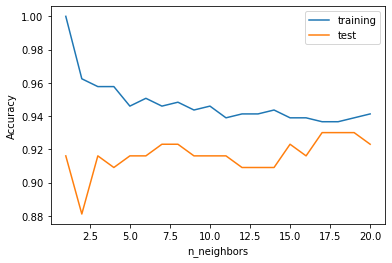

In [87]:
# k (n_neighbors) の値を変化させて正答率
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 0)

training_accuracy = []
test_accuracy = []

for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    training_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

plt.plot(range(1,21),training_accuracy,label='training')
plt.plot(range(1,21),test_accuracy,label='test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

# testの正答率は６－８くらいで近くなるので k はその程度でいい

### サポートベクターマシン

In [89]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 0)
model = LinearSVC(random_state=0)
model.fit(X_train,y_train)
print('正解率(train): {:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test,y_test)))

正解率(train): 0.923
正解率(test): 0.930


/home/komiyama/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [90]:
# 標準化すると精度が上がる
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = LinearSVC(random_state=0)
model.fit(X_train_std,y_train)
print('正解率(train): {:.3f}'.format(model.score(X_train_std,y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test_std,y_test)))

正解率(train): 0.993
正解率(test): 0.951
